In [166]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [16]:
# Read in the sms CSV file
file = pd.read_csv("SMS-Data.csv")
file.head()

#making a copy of the file
file_copy = file.copy()
file

,phoneNumber,id,updateAt,senderAddress,text
0,xx39973810,baa1668c-049e-4118-938e-cc804f1e73aa,"Sat, 7 May 2022 19:48:00 UTC",JK-SmplPL,Rs.95.15 on Zomato charged via Simpl.\r\n--\r\...
1,xx39973810,baa1668c-049e-4118-938e-cc804f1e73aa,"Sat, 7 May 2022 19:48:00 UTC",VP-ViCARE,Hi! Update your email id through WhatsApp: htt...
2,xx39973810,baa1668c-049e-4118-938e-cc804f1e73aa,"Sat, 7 May 2022 19:48:00 UTC",VP-612345,Lucknow ya Kolkata ? - watch it LIVE with Vi c...
3,xx39973810,baa1668c-049e-4118-938e-cc804f1e73aa,"Sat, 7 May 2022 19:48:00 UTC",BP-ACKOGI,"Mohd,\nCheck the incredible Acko insurance pol..."
4,xx39973810,baa1668c-049e-4118-938e-cc804f1e73aa,"Sat, 7 May 2022 19:48:00 UTC",VP-ViCARE,Hi! You can now get your Vi prepaid invoice em...
...,...,...,...,...,...
100238,xx86412509,3d368683-a2a5-4c96-88c0-8c7a3ac8bdc5,"Wed, 4 May 2022 07:14:44 UTC",JD-AKAMAH,"As we celebrate Azadi Ka Amrit Mahotsav, let's..."
100239,xx86412509,3d368683-a2a5-4c96-88c0-8c7a3ac8bdc5,"Wed, 4 May 2022 07:14:44 UTC",+917986412509,"Dear Customer, +917986412509 is now available ..."
100240,xx86412509,3d368683-a2a5-4c96-88c0-8c7a3ac8bdc5,"Wed, 4 May 2022 07:14:44 UTC",+919417271313,"Dear Customer, +919417271313 is now available ..."
100241,xx86412509,3d368683-a2a5-4c96-88c0-8c7a3ac8bdc5,"Wed, 4 May 2022 07:14:44 UTC",+917986412509,"Dear Customer, +917986412509 is now available ..."


In [17]:
# assessing the file
file.describe()

,phoneNumber,id,updateAt,senderAddress,text
count,100243,100243,100243,100243,100237
unique,93,93,138,8929,59377
top,xx31026369,72b90e8a-1960-44f6-9bfc-a19a9410bd47,"Sat, 7 May 2022 14:44:27 UTC",TX-SFXRDR,We are unable to get your location. Location i...
freq,7880,7880,2001,3401,1151


In [18]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100243 entries, 0 to 100242
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   phoneNumber    100243 non-null  object
 1   id             100243 non-null  object
 2   updateAt       100243 non-null  object
 3   senderAddress  100243 non-null  object
 4   text           100237 non-null  object
dtypes: object(5)
memory usage: 3.8+ MB


In [19]:
file['phoneNumber'].nunique()

93

In [20]:
#re-writing the columns in lowercase separated by "_"
file.rename(columns={"phoneNumber":"phone_number","updateAt":"update_at","senderAddress":"sender_address"},inplace=True)
file.head()

,phone_number,id,update_at,sender_address,text
0,xx39973810,baa1668c-049e-4118-938e-cc804f1e73aa,"Sat, 7 May 2022 19:48:00 UTC",JK-SmplPL,Rs.95.15 on Zomato charged via Simpl.\r\n--\r\...
1,xx39973810,baa1668c-049e-4118-938e-cc804f1e73aa,"Sat, 7 May 2022 19:48:00 UTC",VP-ViCARE,Hi! Update your email id through WhatsApp: htt...
2,xx39973810,baa1668c-049e-4118-938e-cc804f1e73aa,"Sat, 7 May 2022 19:48:00 UTC",VP-612345,Lucknow ya Kolkata ? - watch it LIVE with Vi c...
3,xx39973810,baa1668c-049e-4118-938e-cc804f1e73aa,"Sat, 7 May 2022 19:48:00 UTC",BP-ACKOGI,"Mohd,\nCheck the incredible Acko insurance pol..."
4,xx39973810,baa1668c-049e-4118-938e-cc804f1e73aa,"Sat, 7 May 2022 19:48:00 UTC",VP-ViCARE,Hi! You can now get your Vi prepaid invoice em...


In [21]:
# Splitting the update_at column into date and time columns respectively and dropping the update_at column

# Splitting
file['update_at'] = pd.to_datetime(file['update_at'])
file['date'] = file['update_at'].dt.date
file['time'] = file['update_at'].dt.time

#Dropping
file.drop('update_at',axis=1,inplace=True)
file.head()

,phone_number,id,sender_address,text,date,time
0,xx39973810,baa1668c-049e-4118-938e-cc804f1e73aa,JK-SmplPL,Rs.95.15 on Zomato charged via Simpl.\r\n--\r\...,2022-05-07,19:48:00
1,xx39973810,baa1668c-049e-4118-938e-cc804f1e73aa,VP-ViCARE,Hi! Update your email id through WhatsApp: htt...,2022-05-07,19:48:00
2,xx39973810,baa1668c-049e-4118-938e-cc804f1e73aa,VP-612345,Lucknow ya Kolkata ? - watch it LIVE with Vi c...,2022-05-07,19:48:00
3,xx39973810,baa1668c-049e-4118-938e-cc804f1e73aa,BP-ACKOGI,"Mohd,\nCheck the incredible Acko insurance pol...",2022-05-07,19:48:00
4,xx39973810,baa1668c-049e-4118-938e-cc804f1e73aa,VP-ViCARE,Hi! You can now get your Vi prepaid invoice em...,2022-05-07,19:48:00


In [26]:
#Transaction related texts
transactions_text = file['text'].str.contains('data|recharge|payment|bank|otp|money|alert|credit|debit|Amt|paid|deduct|deducted', case=False) == True
transactions = file[transactions_text]
# Credit related texts
debit_text = transactions['text'].str.contains('debited|(alert&debit)|deducted', case=False) == True
debits = transactions[debit_text]

#Debit related texts
credits = transactions[~debit_text]


# Non-transaction related texts
non_transactions = file[~transactions_text]

/home/prince_tesla/.local/lib/python3.8/site-packages/pandas/core/strings/accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


In [44]:
credit_related_texts = credits[credits['text'].str.contains('credited') == True]
credit_related_texts.head(5)

,phone_number,id,sender_address,text,date,time
97,xx80368198,af5cdc15-98d7-40c6-a85d-f8bd7ee8f5e9,VM-INDBNK,Your a/c. XXXX4658 is credited by Rs. 50.00 on...,2022-05-03,08:53:39
264,xx80368198,af5cdc15-98d7-40c6-a85d-f8bd7ee8f5e9,VM-JNGRMY,"Rs. 15 , added just for you! We've credited yo...",2022-05-03,08:53:39
350,xx80368198,af5cdc15-98d7-40c6-a85d-f8bd7ee8f5e9,MPLPRO,Congrats! We've credited Ludo Win ticket to yo...,2022-05-03,08:53:39
379,xx80368198,af5cdc15-98d7-40c6-a85d-f8bd7ee8f5e9,VM-INDBNK,Your a/c. XXXX4658 is credited by Rs. 20.00 on...,2022-05-03,08:53:39
390,xx80368198,af5cdc15-98d7-40c6-a85d-f8bd7ee8f5e9,BV-INDBNK,"Your A/c XXX1824658 is credited by Rs. 6,000 ...",2022-05-03,08:53:39


In [49]:
debit_related_texts = debits[debits['text'].str.contains('debited') == True]
debit_related_texts.head(5)

,phone_number,id,sender_address,text,date,time
53,xx80368198,af5cdc15-98d7-40c6-a85d-f8bd7ee8f5e9,VM-IndBnk,Your VPA sanju39chd@okaxis linked to Indian Ba...,2022-05-03,08:53:39
59,xx80368198,af5cdc15-98d7-40c6-a85d-f8bd7ee8f5e9,VM-IndBnk,Your VPA sanju39chd@okaxis linked to Indian Ba...,2022-05-03,08:53:39
60,xx80368198,af5cdc15-98d7-40c6-a85d-f8bd7ee8f5e9,VK-IndBnk,Your VPA 6280368198@paytm linked to Indian Ban...,2022-05-03,08:53:39
70,xx80368198,af5cdc15-98d7-40c6-a85d-f8bd7ee8f5e9,VK-IndBnk,Your VPA 6280368198@ybl linked to Indian Bank ...,2022-05-03,08:53:39
73,xx80368198,af5cdc15-98d7-40c6-a85d-f8bd7ee8f5e9,VK-IndBnk,Your VPA sanju39chd@okaxis linked to Indian Ba...,2022-05-03,08:53:39


In [51]:
# Checking the credit and debit related texts counts fo visualization
print(f"credit related texts count: {credit_related_texts['text'].count()}")
print(f"debit related texts count: {debit_related_texts['text'].count()}")

credit related texts count: 2506
debit related texts count: 5179


Text(0.5, 1.0, 'DEBIT VS CREDIT')

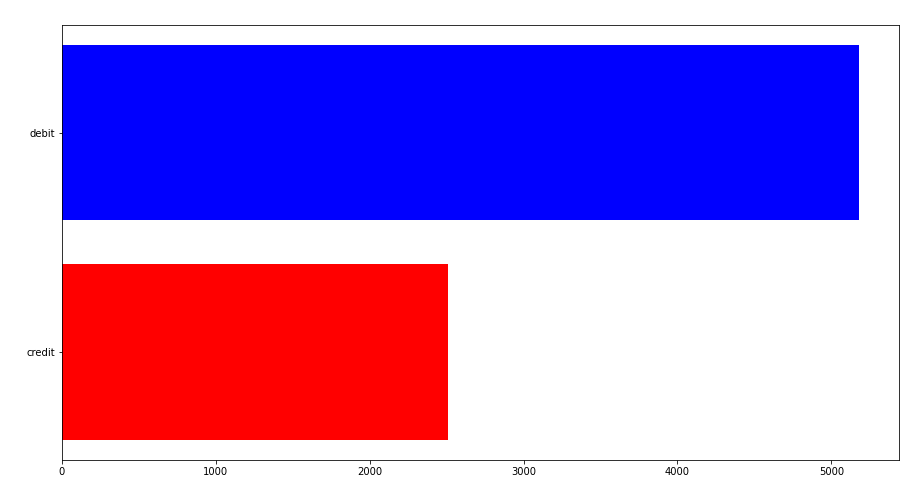

In [154]:
# Plot of counts of debit related and credit related texts
plt.figure(figsize=(15,8))
plt.barh("credit",credit_related_texts['text'].count(),color="red")
plt.barh("debit",debit_related_texts['text'].count(),color="blue")
plt.xlabel("Number of texts",fontdict={"fontsize":15},color="white")
plt.ylabel("Type of text",fontdict={"fontsize":15},color="white")
plt.title("DEBIT VS CREDIT",fontdict={"fontsize":15},color="white")

In [63]:
# Using the groupby function to group the texts and making the count

credit_count = credit_related_texts.groupby('date').count()['text']
debit_count = debit_related_texts.groupby('date').count()['text']
print(f"credit count: {credit_count} \n debit count: {debit_count}")

credit count: date
2022-05-01     25
2022-05-02     70
2022-05-03    158
2022-05-04    313
2022-05-05     53
2022-05-06    162
2022-05-07    110
2022-05-08     42
2022-05-09    146
2022-05-10    774
2022-05-11    417
2022-05-12    236
Name: text, dtype: int64 
 debit count: date
2022-04-30      16
2022-05-01      53
2022-05-02     157
2022-05-03     300
2022-05-04     656
2022-05-05     126
2022-05-06     378
2022-05-07     137
2022-05-08     102
2022-05-09     367
2022-05-10    1725
2022-05-11     879
2022-05-12     283
Name: text, dtype: int64


In [175]:
# Creating a dictionary from the given dataframe for easy visualization

# Credit
credit_dict =  credit_count.to_dict()
credit_keys = credit_dict.keys()
credit_values = credit_dict.values()

# Debit
debit_dict =  debit_count.to_dict()
debit_keys = debit_dict.keys()
debit_values = debit_dict.values()

# Taking the length of the two dictionaries into account and replacing with zero
for key in debit_keys:
    if key not in credit_keys:
        credit_dict[key] = 0
        
credit_dict = sorted(credit_dict.items())
credit_dict = dict(credit_dict)

# Re_ordering credit dict
credit_keys = credit_dict.keys()
credit_values = credit_dict.values()

print(f"credit count: {credit_dict} \n debit count: {debit_dict}")

credit count: {datetime.date(2022, 4, 30): 0, datetime.date(2022, 5, 1): 25, datetime.date(2022, 5, 2): 70, datetime.date(2022, 5, 3): 158, datetime.date(2022, 5, 4): 313, datetime.date(2022, 5, 5): 53, datetime.date(2022, 5, 6): 162, datetime.date(2022, 5, 7): 110, datetime.date(2022, 5, 8): 42, datetime.date(2022, 5, 9): 146, datetime.date(2022, 5, 10): 774, datetime.date(2022, 5, 11): 417, datetime.date(2022, 5, 12): 236} 
 debit count: {datetime.date(2022, 4, 30): 16, datetime.date(2022, 5, 1): 53, datetime.date(2022, 5, 2): 157, datetime.date(2022, 5, 3): 300, datetime.date(2022, 5, 4): 656, datetime.date(2022, 5, 5): 126, datetime.date(2022, 5, 6): 378, datetime.date(2022, 5, 7): 137, datetime.date(2022, 5, 8): 102, datetime.date(2022, 5, 9): 367, datetime.date(2022, 5, 10): 1725, datetime.date(2022, 5, 11): 879, datetime.date(2022, 5, 12): 283}


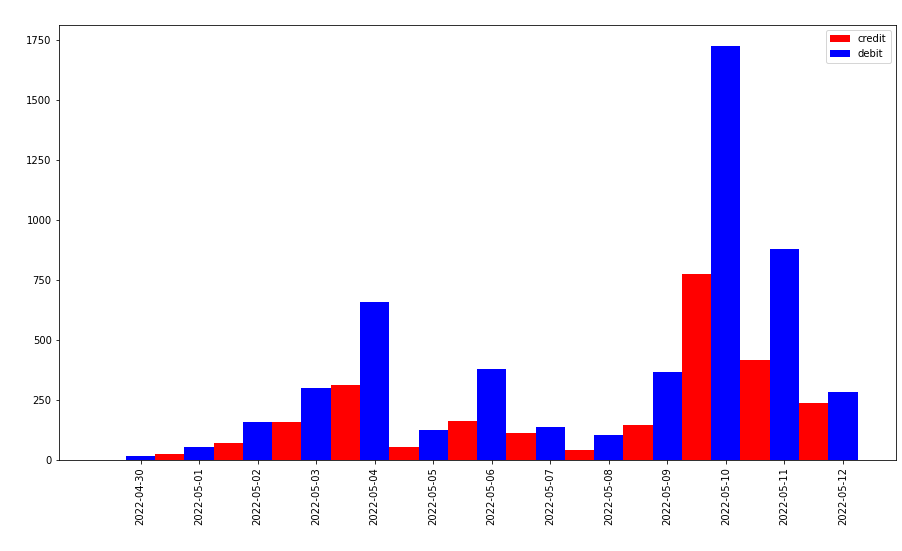

In [176]:
# Plotting these using a barplot
plt.figure(figsize=(15,8),edgecolor="black")
width = 0.5
n = np.arange(len(debit_dict))
plt.bar(n-0.25,credit_values,width,color='red',label="credit")
plt.bar(n+0.25,debit_values,width,color='blue',label="debit")
plt.xticks(n+width/2,credit_keys,rotation=90)
plt.xlabel("Date of text",fontdict={"fontsize":15},color="white")
plt.ylabel("Number of texts per day",fontdict={"fontsize":15},color="white")
plt.title("Number of Transactions per day",fontdict={"fontsize":15},color="white")
plt.legend()